<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week9/Day1/XP_w9_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
df = pd.read_csv('train.csv')


In [20]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
df.head(10)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [22]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [23]:
data=df

In [24]:
data_type_order_date = data['Order Date'].dtype
data_type_order_date


dtype('O')

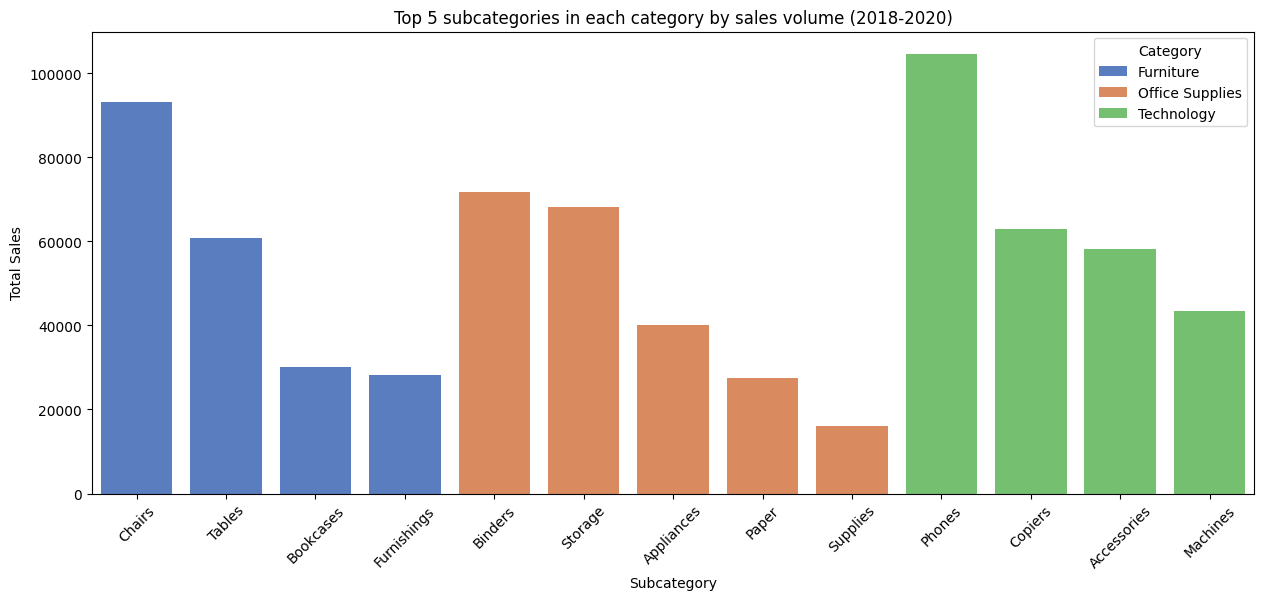

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter data for the specific years 2018 to 2020
filtered_data = data[(data['Order Date'].dt.year >= 2018) & (data['Order Date'].dt.year <= 2020)]

# Group by 'Category' and 'Sub-Category', then calculate total sales
grouped_data = filtered_data.groupby(['Category', 'Sub-Category']).agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Sort the data by 'Category' and 'Total_Sales' in descending order
sorted_sales_data_2018_2020 = grouped_data.sort_values(['Category', 'Total_Sales'], ascending=[True, False])

# Select the top 5 subcategories in each category
top_5_subcategories = sorted_sales_data_2018_2020.groupby('Category').head(5)

# Create a bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Sub-Category', y='Total_Sales', hue='Category', data=top_5_subcategories, palette='muted')

# Set plot details
plt.title('Top 5 subcategories in each category by sales volume (2018-2020)')
plt.xlabel('Subcategory')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'data'

# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Filter data for the specific years 2018 to 2020
filtered_data = data[(data['Order Date'].dt.year >= 2018) & (data['Order Date'].dt.year <= 2020)]

# Group by 'Category' and 'Sub-Category', then calculate total sales
grouped_data = filtered_data.groupby(['Category', 'Sub-Category']).agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

# Sort the data by 'Category' and 'Total_Sales' in descending order
sorted_sales_data_2018_2020 = grouped_data.sort_values(['Category', 'Total_Sales'], ascending=[True, False])

# Select the top 5 subcategories in each category
top_5_subcategories = sorted_sales_data_2018_2020.groupby('Category').head(5)


<ipython-input-34-edf2763bc0fc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')


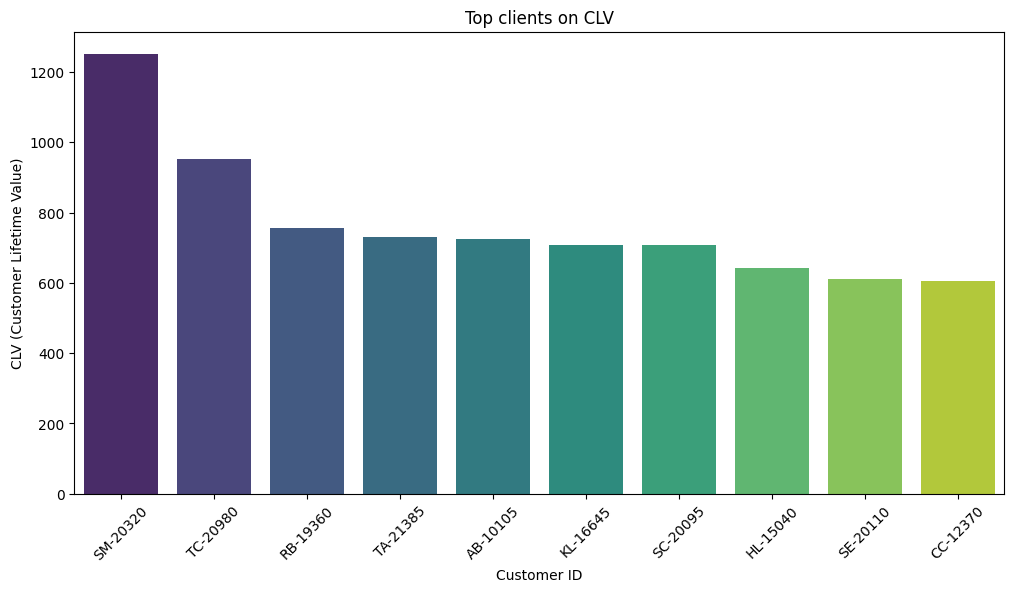

,Customer ID,Purchase_Frequency,Average_Purchase_Value,Total_Sales,CLV
0,AA-10315,5,505.778182,5563.560,278.17800
1,AA-10375,9,70.426000,1056.390,52.81950
2,AA-10480,4,149.209333,1790.512,89.52560
3,AA-10645,6,282.607500,5086.935,254.34675
4,AB-10015,3,147.692667,886.156,44.30780


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Customer ID' and calculate purchase frequency, average purchase value, and total sales
customer_data = data.groupby('Customer ID').agg(
    Purchase_Frequency=('Order ID', 'nunique'),
    Average_Purchase_Value=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# Set the margin rate for CLV calculation
margin_rate = 0.05

# Calculate CLV by multiplying total sales with the margin rate
customer_data['CLV'] = customer_data['Total_Sales'] * margin_rate

# Sort customers by CLV in descending order and select the top 10
top_customers_by_clv = customer_data.sort_values('CLV', ascending=False).head(10)

# Create a bar plot to visualize the top clients based on CLV
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')
plt.title('Top clients on CLV')
plt.xlabel('Customer ID')
plt.ylabel('CLV (Customer Lifetime Value)')
plt.xticks(rotation=45)
plt.show()

# Display the head of the customer_data dataframe
customer_data.head()


<ipython-input-35-004deda07912>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')


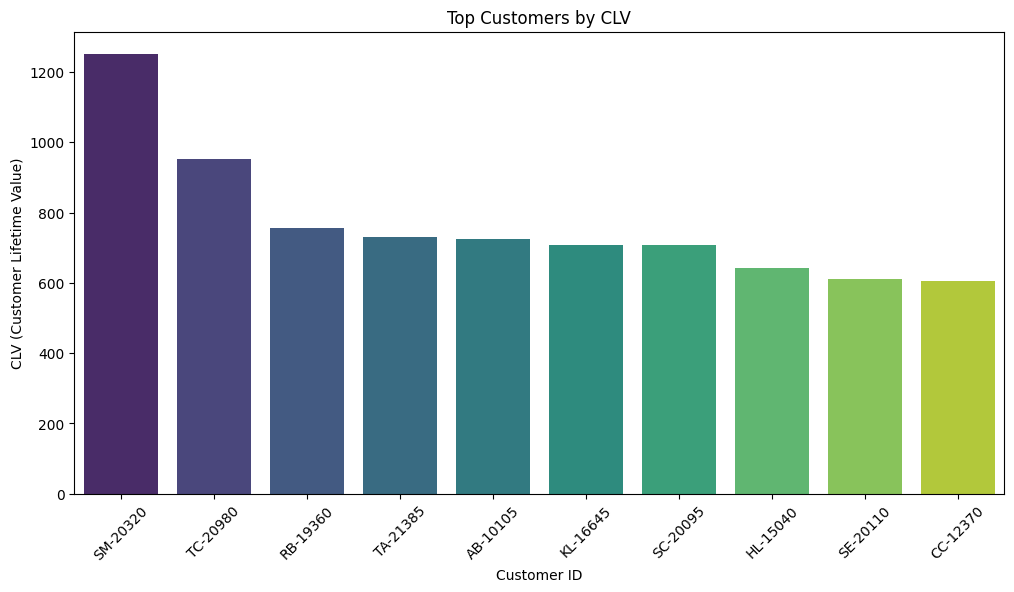

  Customer ID  Purchase_Frequency  Average_Purchase_Value  Total_Sales  \
0    AA-10315                   5              505.778182     5563.560   
1    AA-10375                   9               70.426000     1056.390   
2    AA-10480                   4              149.209333     1790.512   
3    AA-10645                   6              282.607500     5086.935   
4    AB-10015                   3              147.692667      886.156   

         CLV  
0  278.17800  
1   52.81950  
2   89.52560  
3  254.34675  
4   44.30780  


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'data'

# 1. Create a new dataframe summarizing purchase frequency, average purchase value, and total sales per customer
customer_data = data.groupby('Customer ID').agg(
    Purchase_Frequency=('Order ID', 'nunique'),
    Average_Purchase_Value=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

# 2. Calculate CLV for each customer
margin_rate = 0.05
customer_data['CLV'] = customer_data['Total_Sales'] * margin_rate

# 3. Identify top customers by CLV and visualize their contribution
top_customers_by_clv = customer_data.sort_values('CLV', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')
plt.title('Top Customers by CLV')
plt.xlabel('Customer ID')
plt.ylabel('CLV (Customer Lifetime Value)')
plt.xticks(rotation=45)
plt.show()

# 4. Display the head of the customer_data dataframe
print(customer_data.head())
